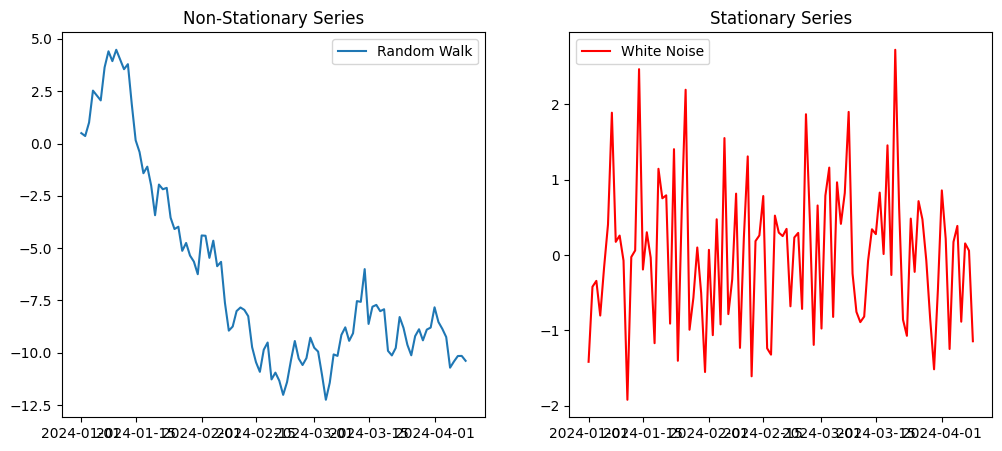

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a non-stationary time series (Random Walk)
np.random.seed(42)
n = 100
random_walk = np.cumsum(np.random.randn(n))  # Cumulative sum to simulate a random walk

# Generate a stationary time series (White Noise)
stationary_series = np.random.randn(n)

# Create a DataFrame with the generated data
df = pd.DataFrame({
    'Date': pd.date_range(start='2024-01-01', periods=n, freq='D'),
    'RandomWalk': random_walk,
    'Stationary': stationary_series
})

df.set_index('Date', inplace=True)

# Plot the series
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(df['RandomWalk'], label="Random Walk")
plt.title("Non-Stationary Series")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df['Stationary'], label="White Noise", color='red')
plt.title("Stationary Series")
plt.legend()

plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

def check_stationarity(series, name="Time Series"):
    print(f"--- {name} ---")

    # Augmented Dickey-Fuller (ADF) Test
    adf_result = adfuller(series)
    print("\nADF Test Results:")
    print(f"Test Statistic: {adf_result[0]}")
    print(f"Number of Lags Used: {adf_result[2]}")
    print(f"P-Value: {adf_result[1]}")
    print(f"Number of Observations Used: {adf_result[3]}")
    print(f"Critical Values: {adf_result[4]}")
    if adf_result[1] < 0.05:
        print("The series is likely stationary (Reject H0)")
    else:
        print("The series is likely non-stationary (Fail to reject H0)")

    # KPSS Test
    kpss_result = kpss(series, regression='c', nlags="auto")
    print("\nKPSS Test Results:")
    print(f"Test Statistic: {kpss_result[0]}")
    print(f"P-Value: {kpss_result[1]}")
    print(f"Critical Values: {kpss_result[3]}")
    if kpss_result[1] > 0.05:
        print("The series is likely stationary (Fail to reject H0)")
    else:
        print("The series is likely non-stationary (Reject H0)")

    print("\n" + "="*40 + "\n")

# Check stationarity for both series
check_stationarity(df['RandomWalk'], "Random Walk (Non-Stationary)")
check_stationarity(df['Stationary'], "White Noise (Stationary)")


--- Random Walk (Non-Stationary) ---

ADF Test Results:
Test Statistic: -1.3583317659818992
Number of Lags Used: 0
P-Value: 0.6020814791099098
Number of Observations Used: 99
Critical Values: {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}
The series is likely non-stationary (Fail to reject H0)

KPSS Test Results:
Test Statistic: 1.2573035522875027
P-Value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is likely non-stationary (Reject H0)


--- White Noise (Stationary) ---

ADF Test Results:
Test Statistic: -10.87545887656584
Number of Lags Used: 0
P-Value: 1.3352313844030673e-19
Number of Observations Used: 99
Critical Values: {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}
The series is likely stationary (Reject H0)

KPSS Test Results:
Test Statistic: 0.065717336830765
P-Value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is likely st

<ipython-input-6-3dc640ddcb33>:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags="auto")
<ipython-input-6-3dc640ddcb33>:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags="auto")


--- Differenced Random Walk (Stationary) ---

ADF Test Results:
Test Statistic: -10.008881137130237
Number of Lags Used: 0
P-Value: 1.800687720719554e-17
Number of Observations Used: 98
Critical Values: {'1%': -3.4989097606014496, '5%': -2.891516256916761, '10%': -2.5827604414827157}
The series is likely stationary (Reject H0)

KPSS Test Results:
Test Statistic: 0.1333699216127277
P-Value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is likely stationary (Fail to reject H0)




<ipython-input-6-3dc640ddcb33>:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags="auto")


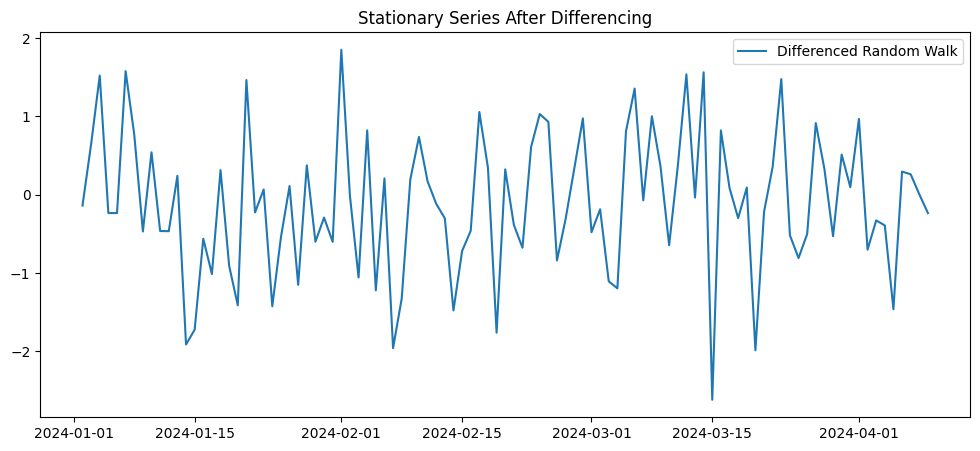

In [ ]:
# Differencing the non-stationary series
df['RandomWalk_diff'] = df['RandomWalk'].diff().dropna()

# Check stationarity after differencing
check_stationarity(df['RandomWalk_diff'].dropna(), "Differenced Random Walk (Stationary)")

# Plot the differenced series
plt.figure(figsize=(12, 5))
plt.plot(df['RandomWalk_diff'], label="Differenced Random Walk")
plt.title("Stationary Series After Differencing")
plt.legend()
plt.show()
